In [96]:
import pandas as pd
import  numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
df=pd.read_csv(r"C:\Users\sanja\Desktop\Main Project\concrete_data.csv")

DATA PREPROCESSING

In [97]:
df

,cement,blast_furnace_slag,fly_ash,water,superplasticizer,coarse_aggregate,fine_aggregate,age,concrete_compressive_strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30
...,...,...,...,...,...,...,...,...,...
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.28
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28,31.18
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28,23.70
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28,32.77


In [98]:
df.shape

(1030, 9)

In [99]:
df.isnull().sum()

cement                           0
blast_furnace_slag               0
fly_ash                          0
water                            0
superplasticizer                 0
coarse_aggregate                 0
fine_aggregate                   0
age                              0
concrete_compressive_strength    0
dtype: int64

In [100]:
df[df.duplicated()]

,cement,blast_furnace_slag,fly_ash,water,superplasticizer,coarse_aggregate,fine_aggregate,age,concrete_compressive_strength
77,425.0,106.3,0.0,153.5,16.5,852.1,887.1,3,33.40
80,425.0,106.3,0.0,153.5,16.5,852.1,887.1,3,33.40
86,362.6,189.0,0.0,164.9,11.6,944.7,755.8,3,35.30
88,362.6,189.0,0.0,164.9,11.6,944.7,755.8,3,35.30
91,362.6,189.0,0.0,164.9,11.6,944.7,755.8,3,35.30
100,425.0,106.3,0.0,153.5,16.5,852.1,887.1,7,49.20
103,425.0,106.3,0.0,153.5,16.5,852.1,887.1,7,49.20
109,362.6,189.0,0.0,164.9,11.6,944.7,755.8,7,55.90
111,362.6,189.0,0.0,164.9,11.6,944.7,755.8,7,55.90
123,425.0,106.3,0.0,153.5,16.5,852.1,887.1,28,60.29


In [101]:
df.drop_duplicates(inplace=True)
df.reset_index()
df.reset_index(drop=True)


,cement,blast_furnace_slag,fly_ash,water,superplasticizer,coarse_aggregate,fine_aggregate,age,concrete_compressive_strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30
...,...,...,...,...,...,...,...,...,...
1000,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.28
1001,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28,31.18
1002,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28,23.70
1003,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28,32.77


In [102]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1005 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   cement                         1005 non-null   float64
 1   blast_furnace_slag             1005 non-null   float64
 2   fly_ash                        1005 non-null   float64
 3   water                          1005 non-null   float64
 4   superplasticizer               1005 non-null   float64
 5   coarse_aggregate               1005 non-null   float64
 6   fine_aggregate                 1005 non-null   float64
 7   age                            1005 non-null   int64  
 8   concrete_compressive_strength  1005 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 78.5 KB


In [103]:
df.describe()

,cement,blast_furnace_slag,fly_ash,water,superplasticizer,coarse_aggregate,fine_aggregate,age,concrete_compressive_strength
count,1005.000000,1005.000000,1005.000000,1005.000000,1005.000000,1005.000000,1005.000000,1005.000000,1005.000000
mean,278.631343,72.043483,55.536318,182.075323,6.033234,974.376816,772.688259,45.856716,35.250378
std,104.344261,86.170807,64.207969,21.339334,5.919967,77.579667,80.340435,63.734692,16.284815
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,190.700000,0.000000,0.000000,166.600000,0.000000,932.000000,724.300000,7.000000,23.520000
50%,265.000000,20.000000,0.000000,185.700000,6.100000,968.000000,780.000000,28.000000,33.800000
75%,349.000000,142.500000,118.300000,192.900000,10.000000,1031.000000,822.200000,56.000000,44.870000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


DATA VISUALIZATION

<Axes: xlabel='cement', ylabel='Count'>

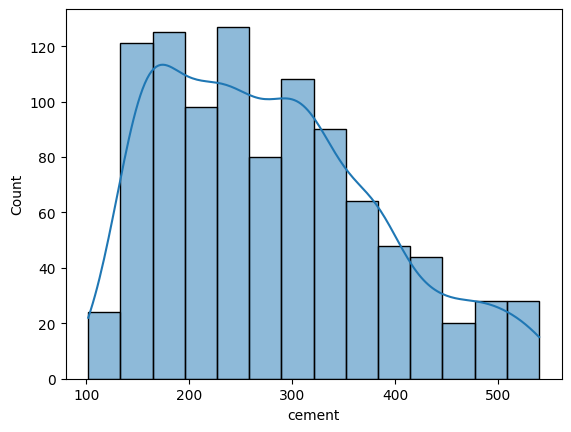

In [104]:
sns.histplot(df['cement'],kde=True)

<Axes: xlabel='blast_furnace_slag', ylabel='Count'>

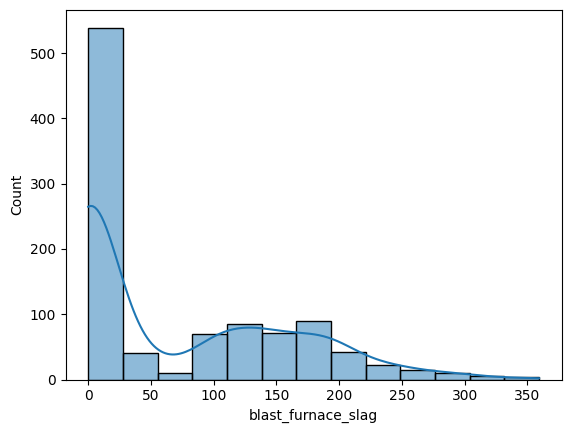

In [105]:
sns.histplot(df['blast_furnace_slag'],kde=True)

<Axes: xlabel='coarse_aggregate', ylabel='Count'>

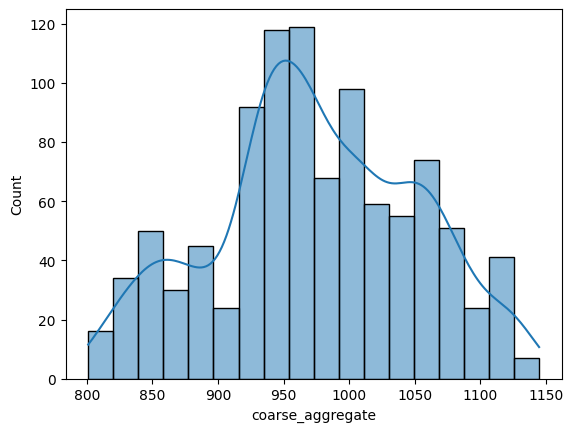

In [106]:
sns.histplot(df['coarse_aggregate'],kde=True)

<Axes: xlabel='fine_aggregate ', ylabel='Count'>

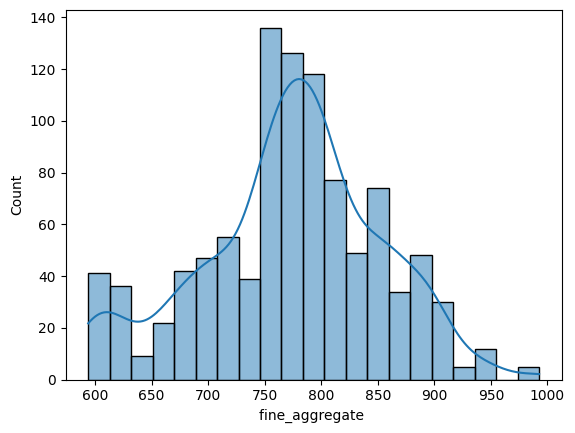

In [107]:
sns.histplot(df['fine_aggregate '],kde=True)

<Axes: xlabel='fly_ash', ylabel='Count'>

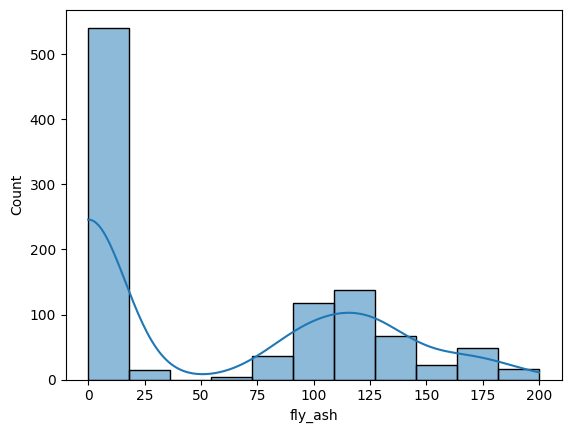

In [108]:
sns.histplot(df['fly_ash'],kde=True)

<Axes: xlabel='water', ylabel='Count'>

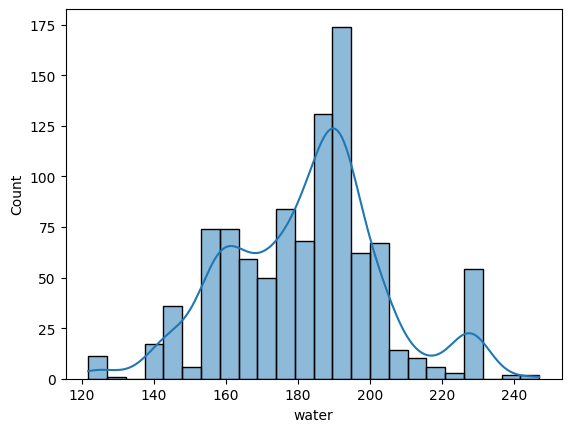

In [109]:
sns.histplot(df['water'],kde=True)

<Axes: xlabel='superplasticizer', ylabel='Count'>

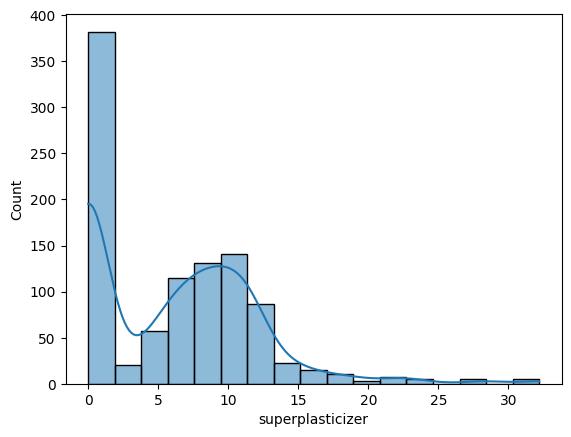

In [110]:
sns.histplot(df['superplasticizer'],kde=True)

<Axes: xlabel='age', ylabel='Count'>

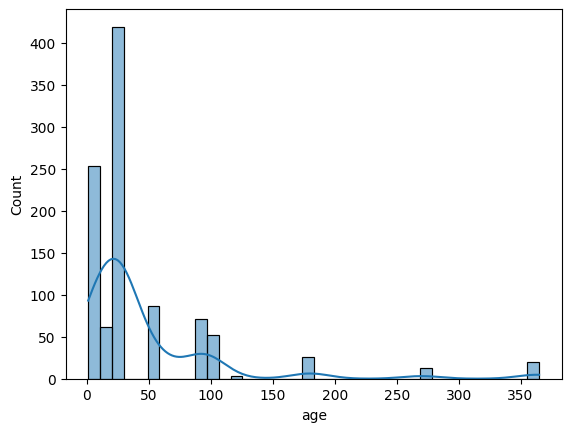

In [111]:
sns.histplot(df['age'],kde=True)

In [112]:
df.skew()

cement                           0.564959
blast_furnace_slag               0.855225
fly_ash                          0.497231
water                            0.034433
superplasticizer                 0.980604
coarse_aggregate                -0.065256
fine_aggregate                  -0.252353
age                              3.253974
concrete_compressive_strength    0.395696
dtype: float64

<Axes: >

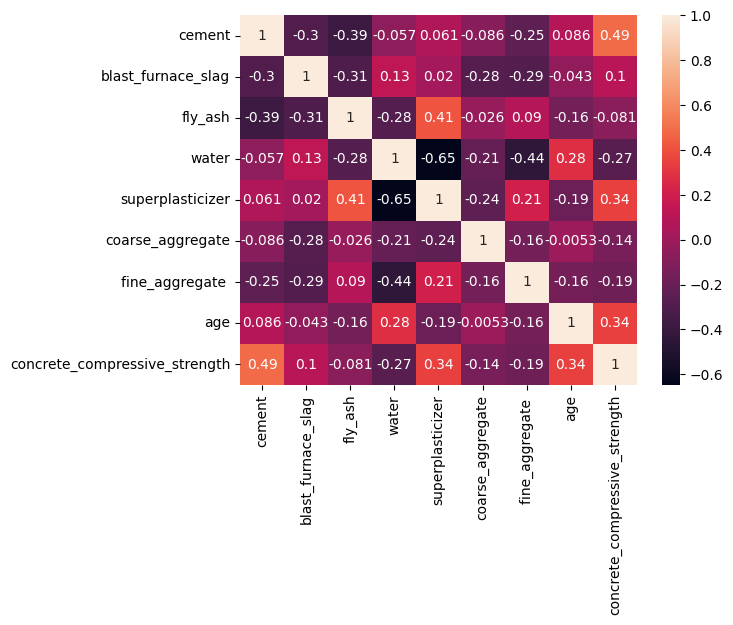

In [113]:

sns.heatmap(df.corr(),annot=True)

MACHINE LEARNING MODELS

In [114]:
x=df.drop('concrete_compressive_strength',axis=1)
y=df['concrete_compressive_strength']

In [115]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=42)

Linear Regression Model

In [116]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_trainl=scaler.fit_transform(x_train)
x_testl=scaler.transform(x_test)
from sklearn.linear_model import LinearRegression
modell=LinearRegression()
modell.fit(x_trainl,y_train)
y_predl=modell.predict(x_testl)
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error,root_mean_squared_error
print("R2 Score:",r2_score(y_test,y_predl))
print("Mean Absolute Error:",mean_absolute_error(y_test,y_predl))
print("Mean Squared Error:",mean_squared_error(y_test,y_predl))
print("Root Mean Squared Error:",root_mean_squared_error(y_test,y_predl))

R2 Score: 0.5801703029028777
Mean Absolute Error: 8.895256221464193
Mean Squared Error: 125.2456480505019
Root Mean Squared Error: 11.191320210346136


KNN REGRESSION

In [117]:
from sklearn.neighbors import KNeighborsRegressor
modelk=KNeighborsRegressor()
params={
    "n_neighbors":[5,6,7,4],
    "algorithm":['ball_tree','‘kd_tree'],
}
search=GridSearchCV(estimator=modelk,param_grid=params)
search.fit(x_trainl,y_train)
y_predk=search.predict(x_testl)
print("R2 Score:",r2_score(y_test,y_predk))
print("Mean Absolute Error:",mean_absolute_error(y_test,y_predk))
print("Mean Squared Error:",mean_squared_error(y_test,y_predk))
print("Root Mean Squared Error:",root_mean_squared_error(y_test,y_predk))

R2 Score: 0.7259852417495993
Mean Absolute Error: 6.838059701492537
Mean Squared Error: 81.7454225124378
Root Mean Squared Error: 9.041317520828356


c:\Users\sanja\Desktop\Main Project\venv\Lib\site-packages\sklearn\model_selection\_validation.py:516: FitFailedWarning: 
20 fits failed out of a total of 40.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
20 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\sanja\Desktop\Main Project\venv\Lib\site-packages\sklearn\model_selection\_validation.py", line 859, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
    ~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\sanja\Desktop\Main Project\venv\Lib\site-packages\sklearn\base.py", line 1358, in wrapper
    estimator._validate_params()
    ~~~~~~~~~~~~~~~~~~~~~~~~~~^^
  File "c:\Users\sanja\Desktop\Main Project\venv\Lib\si

RIDGE AND LASSO

In [118]:
params={"alphas":[1.0,0.1,0.01],
        }
from sklearn.linear_model import RidgeCV
modelr=RidgeCV()
modelr.fit(x_trainl,y_train)
searchr=GridSearchCV(estimator=modelr,param_grid=params,cv=5)
searchr.fit(x_trainl,y_train)
y_predr=searchr.predict(x_testl)
print("R2 Score:",r2_score(y_test,y_predr))
print("Mean Absolute Error:",mean_absolute_error(y_test,y_predr))
print("Mean Squared Error:",mean_squared_error(y_test,y_predr))
print("Root Mean Squared Error:",root_mean_squared_error(y_test,y_predr))


R2 Score: 0.5800177441313283
Mean Absolute Error: 8.897597667613265
Mean Squared Error: 125.2911601291867
Root Mean Squared Error: 11.193353390704088


LASSO

In [119]:
from sklearn.linear_model import LassoCV
modellas=LassoCV()
modellas.fit(x_trainl,y_train)
y_predlas=modellas.predict(x_testl)
print("R2 Score:",r2_score(y_test,y_predlas))
print("Mean Absolute Error:",mean_absolute_error(y_test,y_predlas))
print("Mean Squared Error:",mean_squared_error(y_test,y_predlas))
print("Root Mean Squared Error:",root_mean_squared_error(y_test,y_predlas))


R2 Score: 0.5800606775768027
Mean Absolute Error: 8.89694100119554
Mean Squared Error: 125.27835201380407
Root Mean Squared Error: 11.192781245687064


POLYNOMIAL REGRESSION

In [120]:
from sklearn.preprocessing import PolynomialFeatures
poly=PolynomialFeatures(degree=2)
x_poly=poly.fit_transform(x_trainl)
x_test_poly=poly.transform(x_testl)
modelpoly=LinearRegression()
modelpoly.fit(x_poly,y_train)
y_pred_poly=modelpoly.predict(x_test_poly)
print("R2 Score:",r2_score(y_test,y_pred_poly))
print("Mean Absolute Error:",mean_absolute_error(y_test,y_pred_poly))
print("Mean Squared Error:",mean_squared_error(y_test,y_pred_poly))
print("Root Mean Squared Error:",root_mean_squared_error(y_test,y_pred_poly))

R2 Score: 0.7686333457818475
Mean Absolute Error: 6.219881312315877
Mean Squared Error: 69.02243158402699
Root Mean Squared Error: 8.307973975887682


SVM

In [121]:
from sklearn.svm import SVR
modelsvr=SVR()
modelsvr.fit(x_trainl,y_train)
y_predsvr=modelsvr.predict(x_testl)
print("R2 Score:",r2_score(y_test,y_predsvr))
print("Mean Absolute Error:",mean_absolute_error(y_test,y_predsvr))
print("Mean Squared Error:",mean_squared_error(y_test,y_predsvr))
print("Root Mean Squared Error:",root_mean_squared_error(y_test,y_predsvr))

R2 Score: 0.6000686724189401
Mean Absolute Error: 8.34430876897251
Mean Squared Error: 119.3094691607769
Root Mean Squared Error: 10.922887400352385


DECISION TREE

In [122]:
from sklearn.tree import DecisionTreeRegressor
modeld=DecisionTreeRegressor()
modeld.fit(x_train,y_train)
params = {
        "max_depth": [5,10,20],
    }
searchtree=GridSearchCV(estimator=modeld,param_grid=params,cv=5)
y_predd=modeld.predict(x_test)
print("R2 Score:",r2_score(y_test,y_predd))
print("Mean Absolute Error:",mean_absolute_error(y_test,y_predd))
print("Mean Squared Error:",mean_squared_error(y_test,y_predd))
print("Root Mean Squared Error:",root_mean_squared_error(y_test,y_predd))


R2 Score: 0.8741951865433747
Mean Absolute Error: 3.8900746268656716
Mean Squared Error: 37.530707089552244
Root Mean Squared Error: 6.1262310672673985


RANDOM FOREST

In [123]:
from sklearn.ensemble import RandomForestRegressor
modelrd=RandomForestRegressor()
modelrd.fit(x_train,y_train)
params = {
        "max_depth": [4,5,10,20],
        "min_samples_split": [2,5,10],
    }
searchrrandom=GridSearchCV(estimator=modelrd,param_grid=params,cv=5)
searchrrandom.fit(x_train,y_train)
print(searchrrandom.best_params_)
modelrd=RandomForestRegressor(max_depth=20, min_samples_split=2)
modelrd.fit(x_train,y_train)
y_predrd=searchrrandom.predict(x_test)
print("R2 Score:",r2_score(y_test,y_predrd))
print("Mean Absolute Error:",mean_absolute_error(y_test,y_predrd))
print("Mean Squared Error:",mean_squared_error(y_test,y_predrd))
print("Root Mean Squared Error:",root_mean_squared_error(y_test,y_predrd))


{'max_depth': 20, 'min_samples_split': 2}
R2 Score: 0.9101965649519578
Mean Absolute Error: 3.532424925373136
Mean Squared Error: 26.790599849231807
Root Mean Squared Error: 5.175963663824525


Boosting

In [124]:
from sklearn.ensemble import AdaBoostRegressor
modela=AdaBoostRegressor()
para={
    "n_estimators":[50,100,150],
    "learning_rate":[0.1,1.0],
    "loss":['linear','square']
}
searchaddaboost=GridSearchCV(estimator=modela,param_grid=para,cv=5)
searchaddaboost.fit(x_train,y_train)
y_preda=searchaddaboost.predict(x_test)
print("R2 Score:",r2_score(y_test,y_preda))
print("Mean Absolute Error:",mean_absolute_error(y_test,y_preda))
print("Mean Squared Error:",mean_squared_error(y_test,y_preda))
print("Root Mean Squared Error:",root_mean_squared_error(y_test,y_preda))

R2 Score: 0.806167847594964
Mean Absolute Error: 6.061760572260706
Mean Squared Error: 57.824955473257766
Root Mean Squared Error: 7.604272185637345


In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
modelg=GradientBoostingRegressor()
modelg.fit(x_train,y_train)
params= {
        "n_estimators": [100, 200, 300],
        "learning_rate": [0.01, 0.05, 0.1],
        "max_depth": [3, 5, 7]
    }
searchgradient=GridSearchCV(estimator=modelg,param_grid=params,cv=5)
searchgradient.fit(x_train,y_train)
y_predg=modelg.predict(x_test)
print("R2 Score:",r2_score(y_test,y_predg))
print("Mean Absolute Error:",mean_absolute_error(y_test,y_predg))
print("Mean Squared Error:",mean_squared_error(y_test,y_predg))
print("Root Mean Squared Error:",root_mean_squared_error(y_test,y_predg))

R2 Score: 0.8950623572872705
Mean Absolute Error: 4.115803792023863
Mean Squared Error: 31.305510680459026
Root Mean Squared Error: 5.595132767009111


In [126]:
import pickle
model=pickle.dump(modelrd,open('model.pkl','wb'))